In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('F:\Practice\AirPassengers.csv')

In [23]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [24]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [26]:
df['Month']= pd.to_datetime(df['Month'])
df.index = df['Month']
df.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [27]:
del df['Month']

In [28]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<Axes: xlabel='Month'>

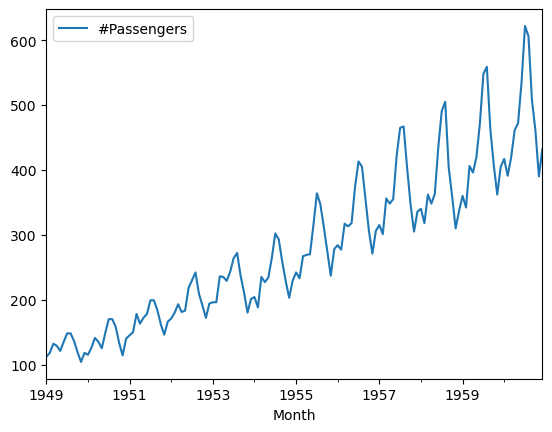

In [30]:
df.plot()

In [31]:
mean_log = df.rolling(window =12).mean()
std_log = df.rolling(window=12).std()

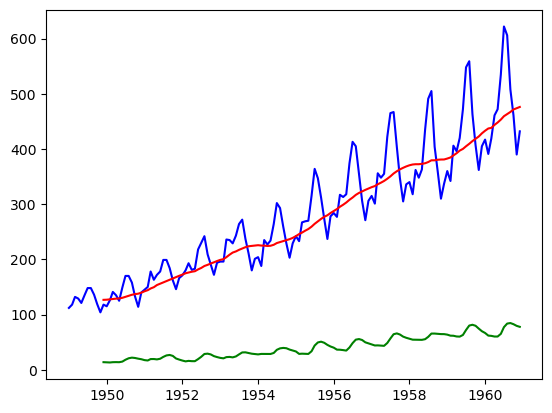

In [32]:
plt.plot(df , color ='blue')
plt.plot(mean_log , color ='red')
plt.plot(std_log , color ='green')

# ADF test Augumented Dickey Fuller Test
# use this test to find the value of P 
# if P> 0.05 - non stat
# If p< 0.05 - stat

In [33]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['#Passengers'])
print(result[1])

0.9918802434376411


In [34]:
if result[1]> 0.5:
    print('this data is not staisfactory')
else:
    print('this data is stationary')

this data is not staisfactory


# For Buiding time series we need stationary data 

In [35]:
first_log = np.log(df)
first_log = first_log.dropna()
first_log.head(10)

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


In [36]:
mean_log_1 = first_log.rolling(window=12).mean()
std_log_1 = first_log.rolling(window=12).std()


In [37]:
new_data = first_log - mean_log_1
new_data = new_data.dropna()
new_data.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [38]:
mean_log_new = new_data.rolling(window=12).mean()
std_log_new = new_data.rolling(window=12).std()

In [46]:
from statsmodels.tsa.stattools import adfuller
result  = adfuller(new_data['#Passengers'])
print(result[1])

0.02223463000124264


In [47]:
if result[1]> 0.05:
 print('this data is not stationary')
else:
 print('this data is stationary')


this data is stationary


# ACF(Auto correction Factor)

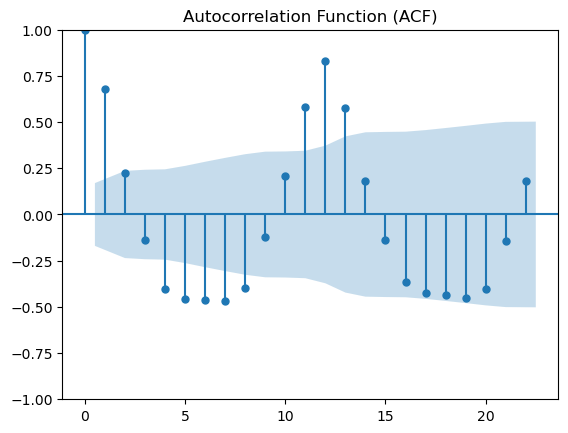

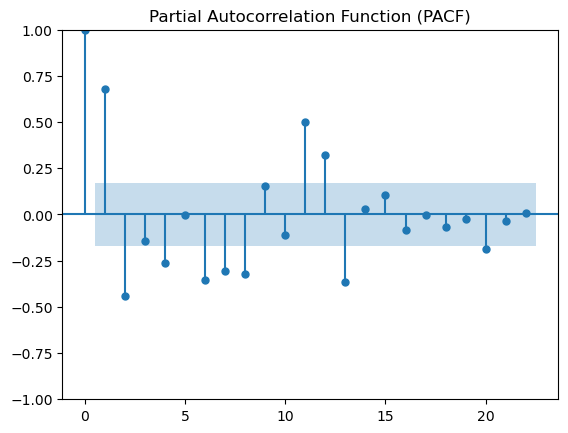

In [73]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = acf(new_data)
pacf_plot = pacf(new_data)

plot_acf(new_data)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(new_data)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [77]:
new_data.shape

(133, 1)

In [80]:
train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[120:]['#Passengers']

In [89]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1, 0, 1))
model = model.fit()


C:\Users\ADITYA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADITYA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADITYA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\ADITYA\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['step']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Month'>

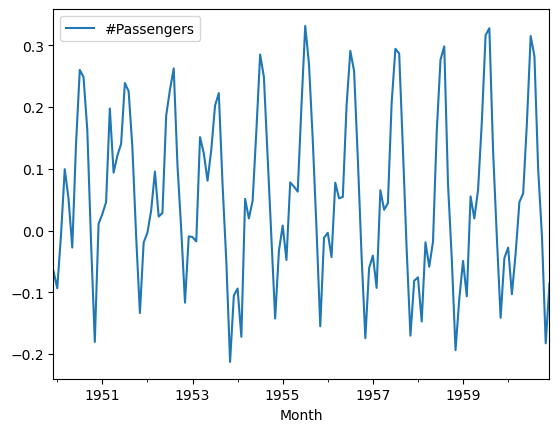

In [90]:
forecast = model.forecast(step=24)
new_data.plot()
forecast.plot()

In [92]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model =SARIMAX(train , order= (1,0,1), seasonal_order=(1,0,1,12))
model = model.fit()

C:\Users\ADITYA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADITYA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADITYA\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<Axes: xlabel='Month'>

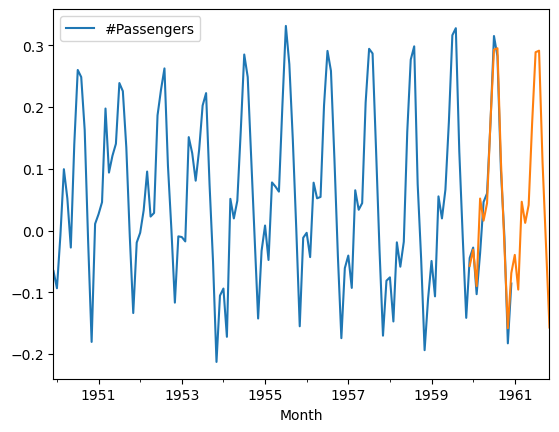

In [93]:
forecast = model.forecast(steps =24)
new_data.plot()
forecast.plot()